# Data Prepping UCDP
This notebook loads the UCDP Georeferenced Event Dataset (GED) Global version 20.1 and aggregates it to the actor-level. The resulting level of analysis is dyad-year and the data containing information on the dyad, year and fatalities are saved. 

In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define plot parameters ------
plt.rcParams["font.family"] = "garamond"
plt.rcParams.update({'font.size': 22})
rcParams.update({'figure.autolayout': True})

In [3]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('C:\\Users\\frank\\Desktop\\master_thesis_out'):
    os.makedirs('C:\\Users\\frank\\Desktop\\master_thesis_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": 'C:\\Users\\frank\\Desktop\\master_thesis_out\desciptive_plots_outcome',
    "desciptive_tables_outcome": 'C:\\Users\\frank\\Desktop\\master_thesis_out\desciptive_tables_outcome',
    "data": 'C:\\Users\\frank\\Desktop\\master_thesis_out\data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["desciptive_tables_outcome"]

'C:\\Users\\frank\\Desktop\\master_thesis_out\\desciptive_tables_outcome'

In [4]:
### UCDP Georeferenced Event Dataset (GED) Global version 20.1 ----------
# Codebook: https://ucdp.uu.se/downloads/ged/ged201.pdf

ucdp = pd.read_csv("https://ucdp.uu.se/downloads/ged/ged201-csv.zip", low_memory=False)
ucdp.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18 00:00:00.000,0,0,0,4,4,4,0,700,NaN


In [5]:
### Which variables are in dataset  -------
for col in ucdp.columns:
    print(col)

id
relid
year
active_year
code_status
type_of_violence
conflict_dset_id
conflict_new_id
conflict_name
dyad_dset_id
dyad_new_id
dyad_name
side_a_dset_id
side_a_new_id
side_a
side_b_dset_id
side_b_new_id
side_b
number_of_sources
source_article
source_office
source_date
source_headline
source_original
where_prec
where_coordinates
where_description
adm_1
adm_2
latitude
longitude
geom_wkt
priogrid_gid
country
country_id
region
event_clarity
date_prec
date_start
date_end
deaths_a
deaths_b
deaths_civilians
deaths_unknown
best
high
low
gwnoa
gwnob


In [6]:
### Only use state-based violence -----
ucdp_s = ucdp[(ucdp["type_of_violence"]==1)].copy()
print(ucdp_s["type_of_violence"].max()) # check
print(ucdp_s["type_of_violence"].min()) # check
ucdp_s.head(3)

1
1


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18 00:00:00.000,0,0,0,4,4,4,0,700,NaN


In [7]:
### How to aggregate data? ---------
ucdp_s[["year", "date_start", "date_end", "dyad_new_id", "best", "active_year"]].sort_values(["year", "dyad_new_id"]).head(4) 
# sum best, high, low over year-dyad_id 

,year,date_start,date_end,dyad_new_id,best,active_year
120497,1989,1989-01-01 00:00:00.000,1989-07-03 00:00:00.000,411,42,1
120498,1989,1989-01-15 00:00:00.000,1989-01-15 00:00:00.000,411,8,1
120499,1989,1989-01-31 00:00:00.000,1989-01-31 00:00:00.000,411,4,1
120500,1989,1989-02-06 00:00:00.000,1989-02-06 00:00:00.000,411,4,1


In [8]:
### Aggregate fatality variables by year-dyad_id  ---------------
best = pd.DataFrame(ucdp_s.groupby(["year", "dyad_new_id"])['best'].sum())
high = pd.DataFrame(ucdp_s.groupby(["year", "dyad_new_id"])['high'].sum())
low = pd.DataFrame(ucdp_s.groupby(["year", "dyad_new_id"])['low'].sum())
best.head()

best
year dyad_new_id      
1989 411           725
     412            97
     422            25
     426           150
     428          1000

In [9]:
### Merge fatality variables and reset index ----------------
best_high = pd.concat([best, high], axis=1)
fat =  pd.concat([best_high, low], axis=1)
fat.head()

if "year" in fat == False:
    fat["year"] = fat.index.get_level_values(0)

if "dyad_new_id" in fat == False:
    fat["dyad_new_id"] = fat.index.get_level_values(1)
    
fat = fat.reset_index()
fat.head()

,year,dyad_new_id,best,high,low
0,1989,411,725,766,704
1,1989,412,97,119,97
2,1989,422,25,25,25
3,1989,426,150,300,17
4,1989,428,1000,1355,809


In [10]:
### Make base dataset: subset of data and drop duplicates (aggregate from event to dyad-level) -------------------
base = ucdp_s[["year", 
               #"country", "region", "country_id", "conflict_name", "conflict_new_id", # not informative anymore because of aggregation
               "side_a", "side_a_new_id", "side_b", "side_b_new_id", "dyad_name", "dyad_new_id", "active_year"]]
base_d = base.drop_duplicates(["year", "dyad_new_id"], keep= 'first')
base_d.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year
0,2017,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1
1,1989,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1
52,1990,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1


In [11]:
### Merge fatalities with base dataset -----
outcome = pd.merge(base_d, fat,  how='inner', on=['year','dyad_new_id'])
outcome.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,low
0,2017,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,10040,12201,9791
1,1989,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1,1545,1745,1374
2,1990,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1,581,1231,515


In [12]:
### Check distribution of outcome ---
print(outcome[outcome.active_year == 0].shape[0]) # 808
outcome[outcome.active_year == 1].shape[0] # 1636

808


1636

In [13]:
### active_year should yield same result as manually coded variable ----
print(outcome[outcome.best < 25].shape[0]) 
outcome[outcome.best >= 25].shape[0] # use active_year as outcome variable

808


1636

In [14]:
### Calculate proportion of active (yes/no) over time ------
time_prop = pd.DataFrame(sorted(outcome.year.unique()))
time_prop["active_no"] = list(outcome.groupby('year')['active_year'].apply(lambda x: (x==0).sum()))
time_prop["active_yes"] = list(outcome.groupby('year')['active_year'].apply(lambda x: (x==1).sum()))
time_prop.columns = ["year", "active_no", "active_yes"]
time_prop.head(3)

,year,active_no,active_yes
0,1989,12,60
1,1990,11,65
2,1991,11,68


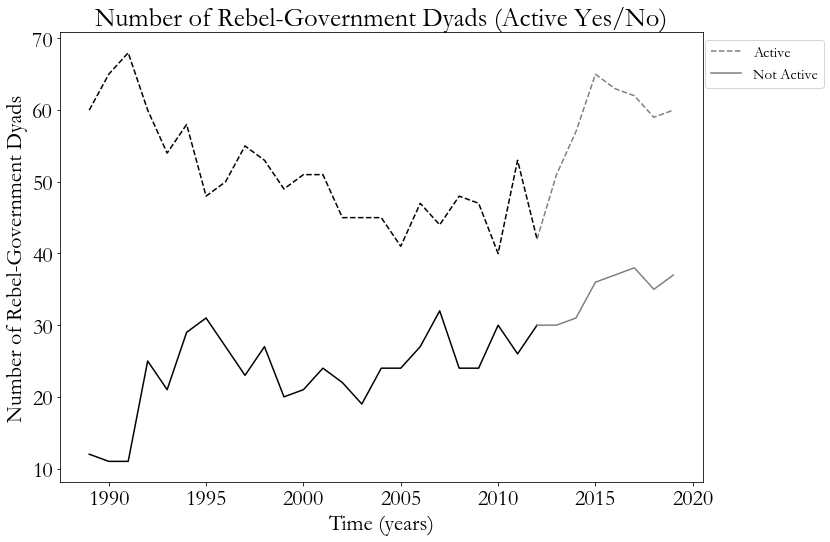

In [15]:
### Plot proportion of active (yes/no) over time ------
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

ax.plot(time_prop["year"][:24],time_prop["active_yes"][:24], color="black", linestyle="dashed");
# years after 2011 will not be included in the final dataset due to data overlap in FORGE
ax.plot(time_prop["year"][23:],time_prop["active_yes"][23:], label = "Active", color="gray", linestyle="dashed");
ax.plot(time_prop["year"][:24],time_prop["active_no"][:24], color="black", linestyle="solid");
ax.plot(time_prop["year"][23:],time_prop["active_no"][23:], label = "Not Active", color="gray", linestyle="solid");

ax.legend(bbox_to_anchor=(1.2, 1), prop={'size': 15})
ax.set(xlabel='Time (years)', ylabel='Number of Rebel-Government Dyads', title=f'Number of Rebel-Government Dyads (Active Yes/No)') 

fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], f"_prop_active_ucdp_all"), dpi=100)

In [16]:
### Reset index -------
outcome.reset_index(drop=False, inplace=False)
outcome.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,low
0,2017,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,10040,12201,9791
1,1989,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1,1545,1745,1374
2,1990,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami...,724,1,581,1231,515


In [17]:
### Which variables are in dataset  -------
for col in outcome.columns:
    print(col)

year
side_a
side_a_new_id
side_b
side_b_new_id
dyad_name
dyad_new_id
active_year
best
high
low


In [18]:
### Save UCDP dataset -----------
outcome.to_csv(os.path.join(out_paths["data"], "ucdp.csv"), index=False, sep=',')